# Act 5.6 Neural Net Robot Navigation

### Importar librerías

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

### Análisis Exploratorio de Datos

El conjuto de datos **Wall-Following Robot Navigation Data** reune una serie de mediciones de sensores de un robot móvil. En este caso, se utilizó un conjunto reducido que reune únicamente 4 de las 24 variables originales; en este solo se contemplan las mediciones de los sensores frontal, trasero, izquierdo y derecho.

Las variables quedan como se muestra a continuación:
- Sensor1: Distancia frontal
- Sensor2: Distancia lateral izquierda
- Sensor3: Distancia lateral derecha
- Sensor4: Distancia trasera

Las etiquetas, o clases, son las siguientes:
- Move-Forward
- Slight-Right-Turn
- Sharp-Right-Turn
- Slight-Left-Turn

El conjunto tiene un total de **5456 muestras**

### Importar datos

In [11]:
data = pd.read_csv("/home/dany/python/Tec/ControlDifuso/Act6/sensor_readings_4.data", header=None)

x = data.iloc[:, :-1].astype(float)  # Todas menos la última columna
y = data.iloc[:, -1].astype(str)     # Última columna como string/categórica

In [12]:
x.head()

,0,1,2,3
0,1.687,0.445,2.332,0.429
1,1.687,0.449,2.332,0.429
2,1.687,0.449,2.334,0.429
3,1.687,0.449,2.334,0.429
4,1.687,0.449,2.334,0.429


In [13]:
y.head()

0    Slight-Right-Turn
1    Slight-Right-Turn
2    Slight-Right-Turn
3    Slight-Right-Turn
4    Slight-Right-Turn
Name: 4, dtype: object

### Distribución de las clases

/tmp/ipykernel_400990/2349568041.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


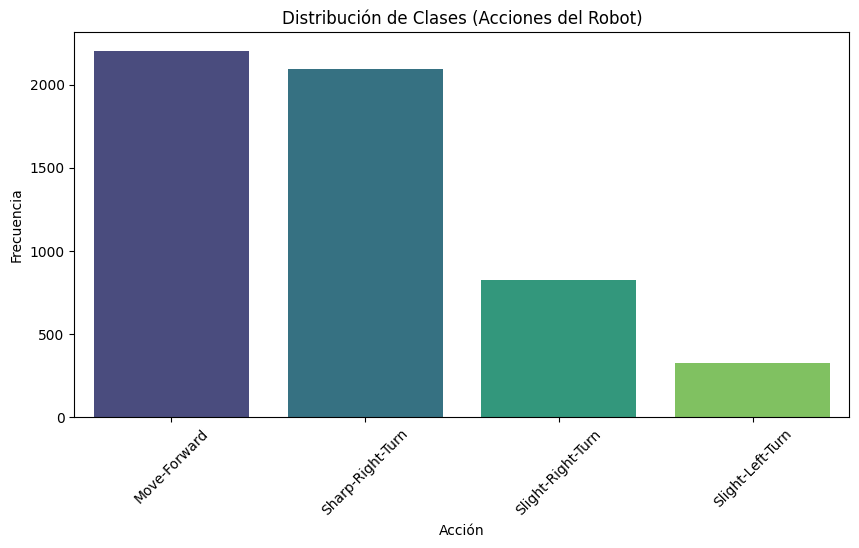

In [14]:
# Contar frecuencias de cada clase
class_counts = y.value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Distribución de Clases (Acciones del Robot)")
plt.xlabel("Acción")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

### Correlación entre sensores

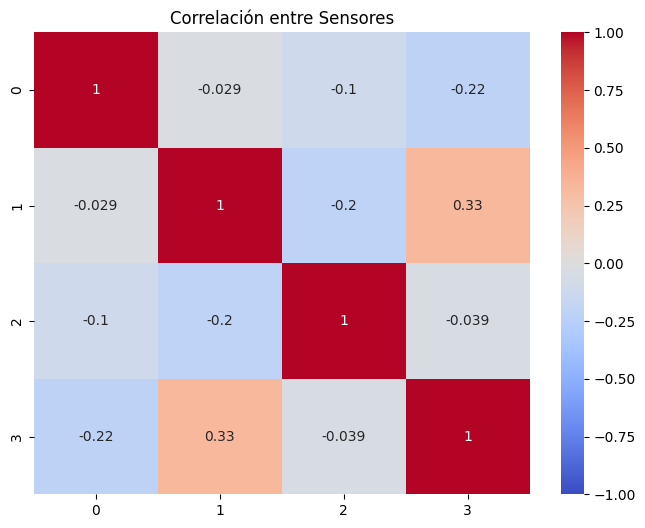

In [15]:
corr_matrix = x.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlación entre Sensores")
plt.show()

### Entrenamiento del modelo (Perceptron multicapa - MLPClassifier)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
clf = MLPClassifier(max_iter=1000)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

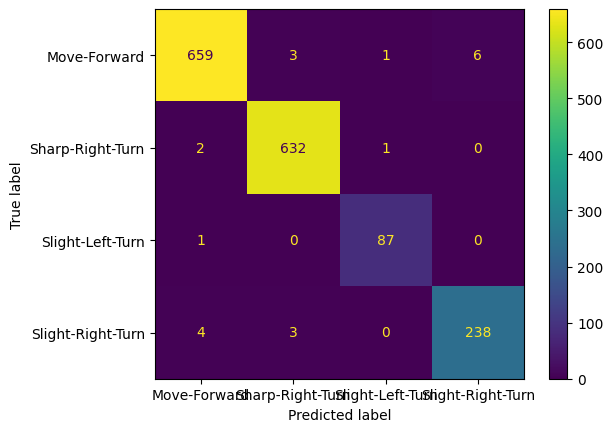

                   precision    recall  f1-score   support

     Move-Forward       0.99      0.99      0.99       669
 Sharp-Right-Turn       0.99      1.00      0.99       635
 Slight-Left-Turn       0.98      0.99      0.98        88
Slight-Right-Turn       0.98      0.97      0.97       245

         accuracy                           0.99      1637
        macro avg       0.98      0.99      0.98      1637
     weighted avg       0.99      0.99      0.99      1637



In [18]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_predict))

### Interpretación de resultados

Lo que se puede observar es que el modelo propuesto es bastante robusto y con un desempeño excelente, casi perfecto.

Las métricas que se utilizaron para determinarlo son **precision**, **recall** y **support**. Considerando que en el conjunto de datos las clases no están balanceadas (donde predomina **Move-Forward**), la métrica de *support* se vuelve relevante para saber si el número de muestras el lo suficientemente significativo para que el modelo pueda aprender de dichas clase.

En este caso, la clase **Slight-Right-Turn** tiene un recall de 0.97, esto indica que pudo clasificar correctamente el 97% de los casos reales de la clase; sin embargo, el que esta clase tenga un support relativamente alto de 245 muestras, sugiriendo que el modelo puede clasificarlo correctamente a pesar del desbalance de clases.